In [4]:
import json
import urllib3
import time
import urllib.request
import pandas as pd
from pandas.io.json import json_normalize
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0
plt.rcParams['savefig.format'] = 'pdf'
plt.rcParams['legend.frameon'] = True

#pd.set_option('display.max_rows', 50)
#pd.set_option('display.max_columns', 50)

import seaborn as sns
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('deep')


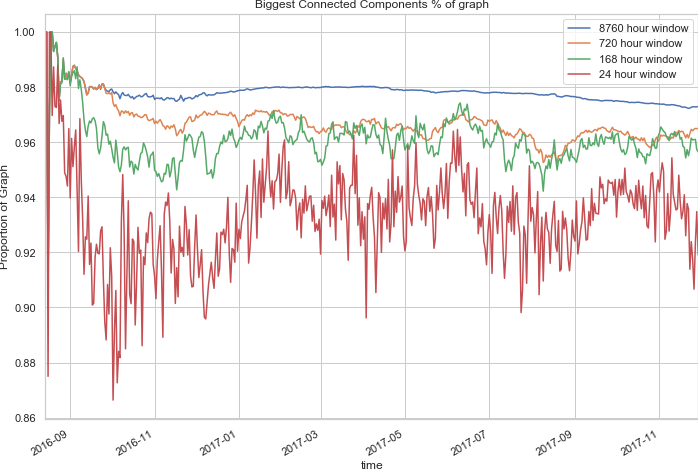

In [5]:
windows = [31536000000,2592000000,604800000,86400000]
with open('bigCC.json') as json_file:
    x = json.load(json_file)
    x= pd.DataFrame(x['views'])
    x['time'] = pd.to_datetime(x['time'],unit='ms')
    x = x[x['total'] != 0]
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plt.title('Biggest Connected Components % of graph')
    plt.xlabel('Date')
    plt.ylabel('Proportion of Graph')
    for i in windows:
        y = x[x['windowsize'] == i]
        hours = str(int((i/3600000)))+" hour window"
        y.plot(x='time', y='proportion',ax=ax, label=hours)
    plt.show()
    

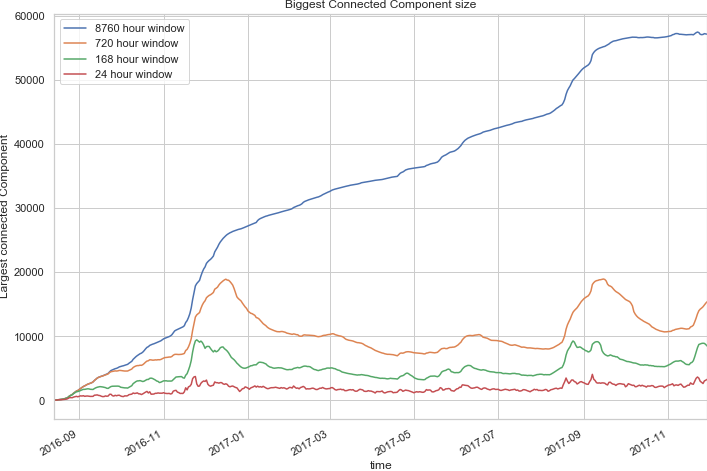

In [6]:
with open('bigCC.json') as json_file:
    x = json.load(json_file)
    x= pd.DataFrame(x['views'])
    x['time'] = pd.to_datetime(x['time'],unit='ms')
    x = x[x['total'] != 0]
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plt.title('Biggest Connected Component size')
    plt.xlabel('Date')
    plt.ylabel('Largest connected Component')
    for i in windows:
        y = x[x['windowsize'] == i]
        hours = str(int((i/3600000)))+" hour window"
        y.plot(x='time', y='biggest',ax=ax, label=hours)
    plt.show()

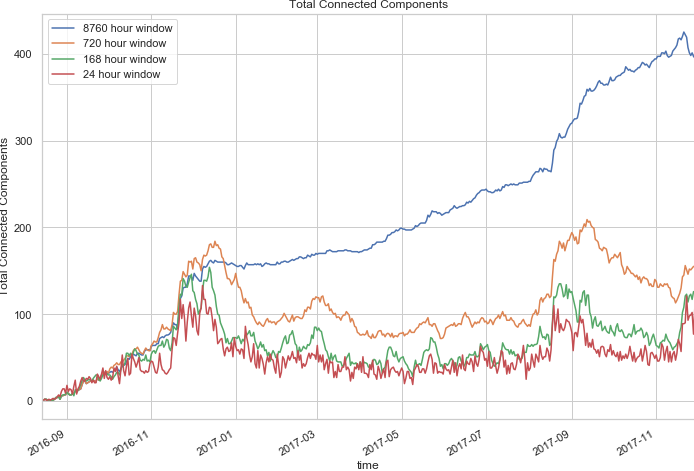

In [7]:
windows = [31536000000,2592000000,604800000,86400000]
with open('bigCC.json') as json_file:
    x = json.load(json_file)
    x= pd.DataFrame(x['views'])
    x['time'] = pd.to_datetime(x['time'],unit='ms')
    x = x[x['total'] != 0]
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plt.title('Total Connected Components')
    plt.xlabel('Date')
    plt.ylabel('Total Connected Components')
    for i in windows:
        y = x[x['windowsize'] == i]
        hours = str(int((i/3600000)))+" hour window"
        y.plot(x='time', y='totalWithoutIslands',ax=ax, label=hours)
    plt.show()

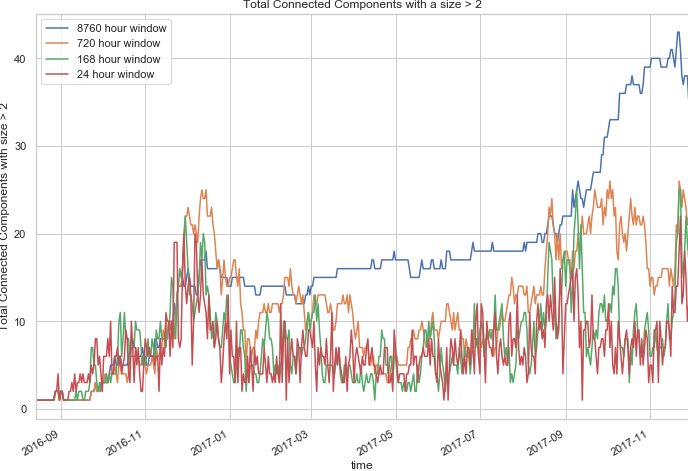

In [8]:
windows = [31536000000,2592000000,604800000,86400000]
with open('bigCC.json') as json_file:
    x = json.load(json_file)
    x= pd.DataFrame(x['views'])
    x['time'] = pd.to_datetime(x['time'],unit='ms')
    x = x[x['total'] != 0]
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plt.title('Total Connected Components with a size > 2')
    plt.xlabel('Date')
    plt.ylabel('Total Connected Components with size > 2')
    for i in windows:
        y = x[x['windowsize'] == i]
        hours = str(int((i/3600000)))+" hour window"
        y.plot(x='time', y='clustersGT2',ax=ax, label=hours)
    plt.show()

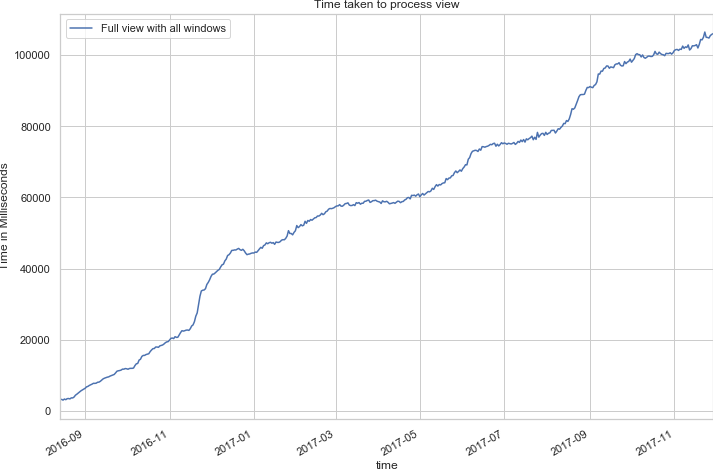

In [9]:
windows = [31536000000,2592000000,604800000,86400000]
with open('bigCC.json') as json_file:
    x = json.load(json_file)
    x= pd.DataFrame(x['views'])
    x['time'] = pd.to_datetime(x['time'],unit='ms')
    x = x[x['total'] != 0]
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plt.title('Time taken to process view')
    plt.xlabel('Date')
    plt.ylabel('Time in Milliseconds')
    hours = "Full view with all windows"
    x.plot(x='time', y='viewTime',ax=ax, label=hours)
    plt.show()